In [180]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np

In [181]:
# Sat scores per district in 2012
sat_district = pd.read_csv("MassEduDataChallenge-master/assessment/clean_sat_district_2011_2012.csv")
# Expenditures per district 2005-2012
pupil_exp = pd.read_csv("MassEduDataChallenge-master/financial/per_pupil_expenditure_report_2005_2012.csv")

In [182]:
# seeing the highest performing districts in SAT Critical Reading
sat_district.head(20).sort_values("Reading", ascending=False).reset_index()

,index,DISTRICT,ORG_CODE,Tests Taken,Reading,Writing,Math
0,3,Acton-Boxborough,6000000,446,611.0,612.0,650.0
1,5,Advanced Math and Science Academy Charter (Dis...,4300000,59,611.0,603.0,638.0
2,9,Amherst-Pelham,6050000,204,579.0,577.0,586.0
3,11,Arlington,100000,238,564.0,559.0,565.0
4,10,Andover,90000,403,560.0,562.0,586.0
5,13,Ashland,140000,166,543.0,526.0,578.0
6,7,Amesbury,70000,101,529.0,506.0,524.0
7,12,Ashburnham-Westminster,6100000,148,516.0,511.0,529.0
8,2,Academy Of the Pacific Rim Charter Public (Dis...,4120000,41,491.0,499.0,514.0
9,1,Abington,10000,84,490.0,480.0,508.0


In [183]:
# seeing the highest performing districts in SAT Math
sat_district.head(20).sort_values("Math", ascending=False).reset_index()
# unsurprisingly, math and reading rankings are almost identical

,index,DISTRICT,ORG_CODE,Tests Taken,Reading,Writing,Math
0,3,Acton-Boxborough,6000000,446,611.0,612.0,650.0
1,5,Advanced Math and Science Academy Charter (Dis...,4300000,59,611.0,603.0,638.0
2,10,Andover,90000,403,560.0,562.0,586.0
3,9,Amherst-Pelham,6050000,204,579.0,577.0,586.0
4,13,Ashland,140000,166,543.0,526.0,578.0
5,11,Arlington,100000,238,564.0,559.0,565.0
6,12,Ashburnham-Westminster,6100000,148,516.0,511.0,529.0
7,7,Amesbury,70000,101,529.0,506.0,524.0
8,2,Academy Of the Pacific Rim Charter Public (Dis...,4120000,41,491.0,499.0,514.0
9,4,Adams-Cheshire,6030000,74,489.0,495.0,512.0


In [184]:
# expenditures by school district
pupil_exp.head(10)

,FY,ORG_CODE,DISTRICT NAME,EXPENDITURES,Total_FTE Membership,gen_fund,grants,tot_exp,per_pupil
0,2005,10000,ABINGTON,Instructional Leadership,2423.7,873277.0,2070.0,875347.0,368.88
1,2005,10000,ABINGTON,Classroom and Specialist Teachers,2423.7,7300554.0,502295.0,7802849.0,3288.18
2,2005,10000,ABINGTON,Payments To Out-Of-District Schools,2423.7,2010581.0,269199.0,2279780.0,44966.07
3,2005,10000,ABINGTON,Out-of-District Transportation (3300),2423.7,113881.0,0.0,113881.0,2246.17
4,2005,10000,ABINGTON,"Instructional Materials, Equipment and Technology",2423.7,317786.0,83714.0,401500.0,169.20
5,2005,10000,ABINGTON,Professional Development,2423.7,260697.0,25274.0,285971.0,120.51
6,2005,10000,ABINGTON,TOTAL EXPENDITURES,2423.7,18160320.0,1826405.0,19986725.0,8246.37
7,2005,10000,ABINGTON,Administration,2423.7,656300.0,0.0,656300.0,276.57
8,2005,10000,ABINGTON,"Guidance, Counseling and Testing",2423.7,467116.0,142057.0,609173.0,256.71
9,2005,10000,ABINGTON,Pupil Services,2423.7,856285.0,861348.0,1717633.0,723.82


In [185]:
# get only the Total Expenditures in 2012
pupil_exp_total = pupil_exp[pupil_exp.EXPENDITURES == "TOTAL EXPENDITURES"]
pupil_exp_total_2012 = pupil_exp_total[pupil_exp_total.FY == 2012]

In [186]:
pupil_exp_total_2012.head(10)

,FY,ORG_CODE,DISTRICT NAME,EXPENDITURES,Total_FTE Membership,gen_fund,grants,tot_exp,per_pupil
34536,2012,10000,ABINGTON,TOTAL EXPENDITURES,2122.5,22354527.0,2807532.0,25162059.0,11854.9159
34544,2012,20000,ACTON,TOTAL EXPENDITURES,2558.0,27237942.0,2612109.0,29850051.0,11669.2928
34554,2012,30000,ACUSHNET,TOTAL EXPENDITURES,1263.8,13140048.0,1435323.0,14575371.0,11532.9728
34572,2012,50000,AGAWAM,TOTAL EXPENDITURES,4076.2,48166240.0,6445515.0,54611755.0,13397.7123
34598,2012,70000,AMESBURY,TOTAL EXPENDITURES,2493.8,28206669.0,2657916.0,30864585.0,12376.5278
34604,2012,80000,AMHERST,TOTAL EXPENDITURES,1298.4,22234117.0,1641090.0,23875207.0,18388.1754
34621,2012,90000,ANDOVER,TOTAL EXPENDITURES,6373.1,79553751.0,8624807.0,88178558.0,13836.0544
34636,2012,100000,ARLINGTON,TOTAL EXPENDITURES,5004.6,55830223.0,7242436.0,63072659.0,12602.9371
34653,2012,140000,ASHLAND,TOTAL EXPENDITURES,2692.1,28443991.0,4353270.0,32797261.0,12182.7796
34667,2012,160000,ATTLEBORO,TOTAL EXPENDITURES,6234.4,62928690.0,8946228.0,71874918.0,11528.7627


In [187]:
# merged sat table with expenditure table
merged = pd.merge(pupil_exp_total_2012, sat_district, on='ORG_CODE')
# use only districts with results
merged = merged[pd.notnull(merged['Writing'])]
merged = merged[pd.notnull(merged['Reading'])]
merged = merged[pd.notnull(merged['per_pupil'])]

In [188]:
x = merged.per_pupil
y_math = merged.Math
y_read = merged.Reading
y = y_math + y_read

In [189]:
sat_stats = linregress(x, y)
m = sat_stats.slope
b = sat_stats.intercept
line = (m * x) + b

In [190]:
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]

# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.  
for i in range(len(tableau20)):
    r, g, b = tableau20[i]
    tableau20[i] = (r / 255., g / 255., b / 255.)

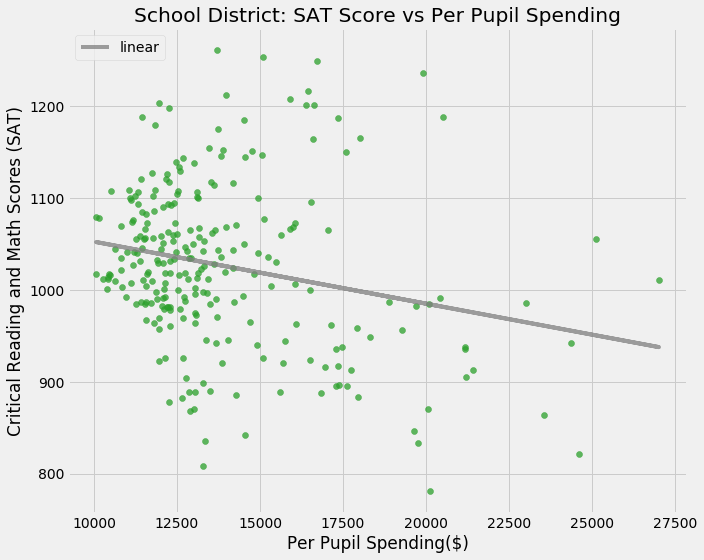

In [191]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,8))
plt.scatter(x, y, c=tableau20[4], alpha=0.75)
plt.title("School District: SAT Score vs Per Pupil Spending")
plt.xlabel("Per Pupil Spending($)")
plt.ylabel("Critical Reading and Math Scores (SAT)")
plt.tight_layout()
plt.plot(x, line, c=tableau20[14], alpha=0.75, label="linear")
plt.legend(loc='upper left', frameon=True)

From this graph, we can see that an increase in per pupil spending doesn't cause an increase in SAT scores. Let's see if this trend holds across other performance indicators.

# Per Pupil Spending and AP Scores

In [192]:
# ap scores per district
ap_district = pd.read_csv("MassEduDataChallenge-master/assessment/clean_ap_district_2011_2012.csv")

In [193]:
ap_district.head()

,District Name,ORG_CODE,Tests Taken,Score=1,Score=2,Score=3,Score=4,Score=5,Score_1_2,Score_3_5
0,Abington,10000,105,12,36,40,11,6,45.7,54.3
1,Academy Of the Pacific Rim Charter Public (Dis...,4120000,55,36,11,3,3,2,85.5,14.5
2,Acton-Boxborough,6000000,934,9,20,71,229,605,3.1,96.9
3,Adams-Cheshire,6030000,78,23,18,19,15,3,52.6,47.4
4,Advanced Math and Science Academy Charter (Dis...,4300000,220,5,11,34,66,104,7.3,92.7


In [194]:
merged = pd.merge(merged, ap_district, on="ORG_CODE")
merged = merged[pd.notnull(merged['per_pupil'])]
merged = merged[pd.notnull(merged['Score_3_5'])]

In [196]:
x = merged.per_pupil
y = merged.Score_3_5

In [197]:
ap_stats = linregress(x, y)

In [198]:
m = ap_stats.slope
b = ap_stats.intercept
line = (m * x) + b

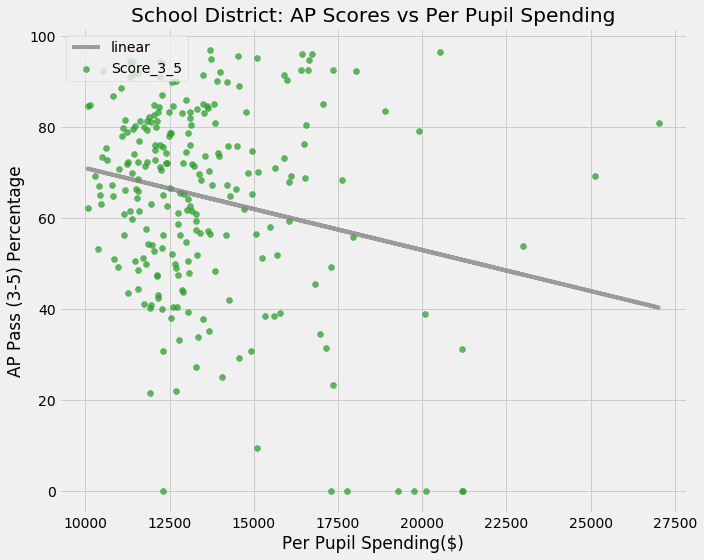

In [199]:
plt.figure(figsize=(10,8))
plt.scatter(x, y, c=tableau20[4], alpha=0.75)
plt.title("School District: AP Scores vs Per Pupil Spending")
plt.xlabel("Per Pupil Spending($)")
plt.ylabel("AP Pass (3-5) Percentage")
plt.tight_layout()
plt.plot(x, line, c=tableau20[14], alpha=0.75, label="linear")
plt.legend(loc='upper left', frameon=True)

It turns out that AP Scores have a similar result to SAT Scores. There is no relationship between an increase in per pupil spending and an increase in AP Score percentage.